In [1]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Pedestrian_model/


/content/drive/MyDrive/Pedestrian_model


In [3]:
!ls

pedestrian_correct_data  pedestrian_correct_data.zip


## Unzip the data file 

In [ ]:
#!unzip '/content/drive/MyDrive/Pedestrian_model/pedestrian_correct_data.zip' -d '/content/drive/MyDrive/Pedestrian_model/'

In [ ]:
#Importer les bibliotheques

In [3]:
import os
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
#Cloner Yolov3 

!git clone https://github.com/roboflow-ai/yolov3  # clone

Cloning into 'yolov3'...
remote: Enumerating objects: 8443, done.
remote: Total 8443 (delta 0), reused 0 (delta 0), pack-reused 8443
Receiving objects: 100% (8443/8443), 6.89 MiB | 8.80 MiB/s, done.
Resolving deltas: 100% (5825/5825), done.


In [4]:
# Access the train folder to create two folders containing the images and their labels 
%cd /content/drive/MyDrive/Pedestrian_model/pedestrian_correct_data/train/

/content/drive/MyDrive/Pedestrian_model/pedestrian_correct_data/train


In [ ]:
!ls

In [ ]:
#Creation of two folders images and labels 
%mkdir labels
%mkdir images

In [ ]:
#Insert images and lables in their respective folders
%mv *.jpg ./images/
%mv *.txt ./labels/

In [6]:
!ls

classes.names  images  labels  yolov3


In [7]:
# Go to the image folder to create a link with the labels
%cd /content/drive/MyDrive/Pedestrian_model/pedestrian_correct_data/train/images/

/content/drive/MyDrive/Pedestrian_model/pedestrian_correct_data/train/images


In [8]:
# Create a text file trainimages.txt 
file = open("train_images.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "train_images.txt":
        pass
      else:
        file.write("../train/images/" + filename + "\n")
file.close()

## Do the same data processing for the validation

In [ ]:
# Access to validation data 
%cd ../../valid

/content/drive/My Drive/Pedestrian_model/pedestrian_correct_data/valid


In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [7]:
%cd images

/content/drive/My Drive/Pedestrian_model/pedestrian_correct_data/train/images


In [9]:
# Create the validation text file
file = open("valid_images.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "valid_images.txt":
        pass
      else:
        file.write("../valid/images/" + filename + "\n")
file.close()

# Model configuration

In [11]:
%cd /content/drive/MyDrive/Pedestrian_model/pedestrian_correct_data/yolov3/data

/content/drive/MyDrive/Pedestrian_model/pedestrian_correct_data/yolov3/data


In [10]:
# update the classes in the robolwo.data file located in yolo3/data/
# update the roboflow.data file with correct number of classes
import re

with open("pedestrian.data") as f:
    s = f.read()
with open("pedestrian.data", 'w') as f:
    
    # Set number of classes num_classes.
    s = re.sub('classes=[0-9]+',
               'classes={}'.format(2), s)
    f.write(s)

In [12]:
%cat pedestrian.data

classes=2
train=../train/images/train_images.txt
valid=../valid/images/valid_images.txt
names=../train/classes.names


# Model training

In [13]:
#Go back to the yolo3 folder to start training
%cd ../

/content/drive/My Drive/Pedestrian_model/pedestrian_correct_data/yolov3


In [14]:
!python3 train.py --data data/pedestrian.data --epochs 100

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/pedestrian.data', device='', epochs=100, evolve=False, img_size=[416], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, var=None, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-12-30 14:37:12.775427: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (927 found, 1 missing, 1 empty, 0 duplicate, for 929 images): 100% 929/929 [02:39<00:00,  5.81it/s]
Caching labels (233 found, 0 missing, 0 empty, 0 duplicate, for 233 images): 100% 233/233 [00:41<00:00,  5.66it/s]
Using 2 dataloader workers
Starting training for 100 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total 

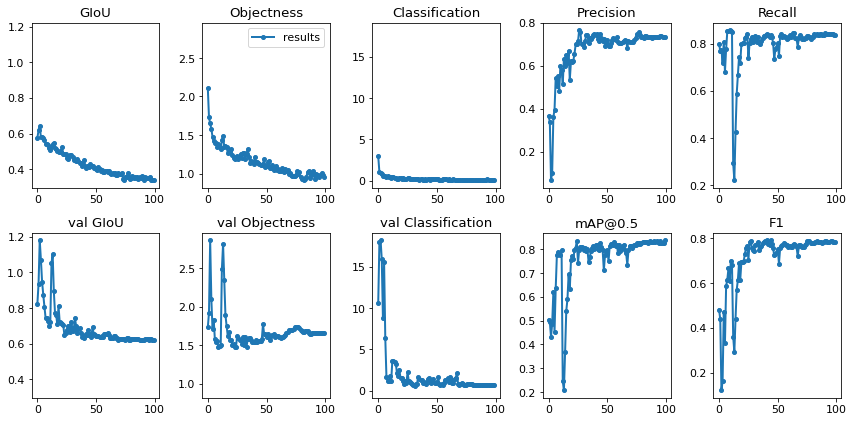

In [15]:
# See the performance of the model 
from utils import utils; utils.plot_results()

In [16]:
# Let's display the different results
!python3 detect.py --weights weights/last.pt --source=../test --names=../train/classes.names

Namespace(agnostic_nms=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.6, names='../train/classes.names', output='output', save_txt=False, source='../test', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
/content/drive/My Drive/Pedestrian_model/pedestrian_correct_data/yolov3/utils/utils.py:532: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  i, j = (pred[:, 5:] > conf_thres).nonzero().t()
image 1/235 ../test/image (1).jpg: 416x320 1 Persons, Done. (0.049s)
image 2/235 ../test/image (10).jpg: 288x416 2 Persons, Done. (0.033s)
image 3/235 ../test/image (100).jpg: 320x416 1 Persons, Don

In [17]:
# import libraries for display
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image
from glob import glob
import random
import PIL

image (208).jpg


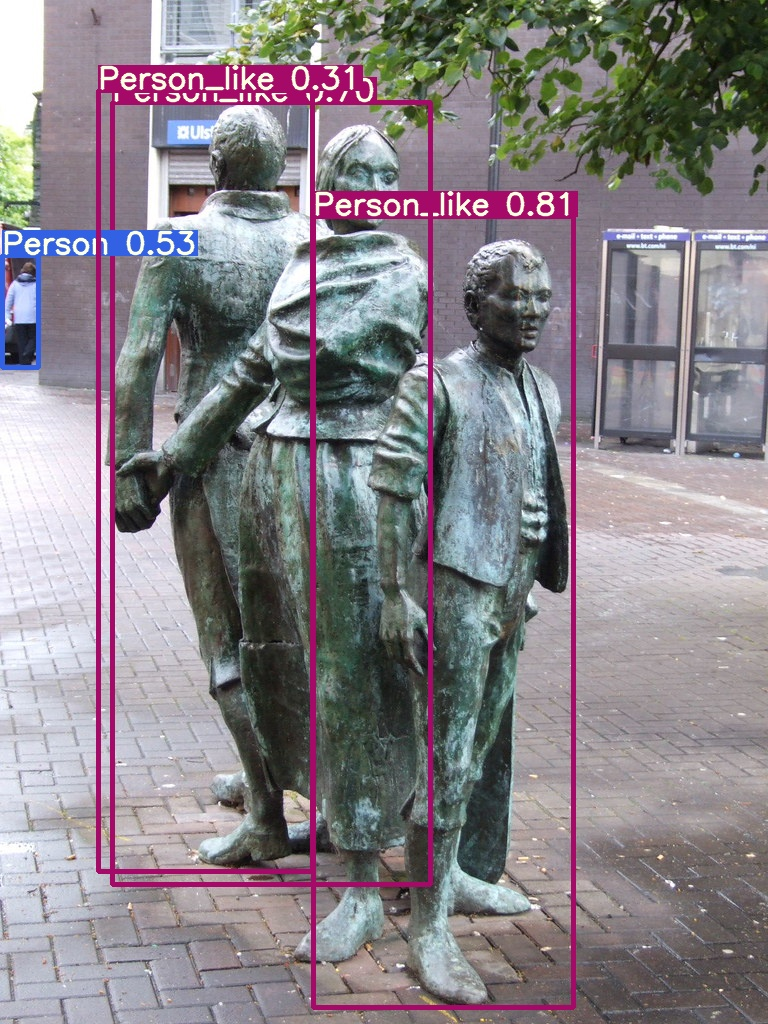

In [32]:
# plot one random image prediction
filename = random.choice(os.listdir('./output'))
print(filename)
Image('./output/' + filename)

In [52]:
#### save locally

from google.colab import files
files.download('./weights/last.pt')